In [200]:
import nltk
import decimal
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [201]:
# visual
%config InlineBackend.figure_format = 'retina'
sns.set_context('notebook')

In [202]:
# read the file into a list for analysis
df = pd.read_excel('reviews.xlsx', sheet_name='Restaurant_Reviews')
review_list = []
for values in df.values:
    if not isinstance(values[0], float):
        review_list.append(values[0])
    
review_list

['Wow... Loved this place.',
 'Crust is not good.',
 'Not tasty and the texture was just nasty.',
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
 'The selection on the menu was great and so were the prices.',
 'Now I am getting angry and I want my damn pho.',
 "Honeslty it didn't taste THAT fresh.)",
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
 'The fries were great too.',
 'A great touch.',
 'Service was very prompt.',
 'Would not go back.',
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
 'I was disgusted because I was pretty sure that was human hair.',
 'I was shocked because no signs indicate cash only.',
 'Highly recommended.',
 'Waitress was a little slow in service.',
 'This place is not worth your time, let alone Vegas.',
 'did not like at all.

In [203]:
# analyse each element of list and fill arrays with positive and negative sentiments seperately.
sentiment_polarity = []
sentiment_review = []
    
for sen in review_list:
    if sia.polarity_scores(sen)["pos"] > sia.polarity_scores(sen)["neg"]:
        sentiment_polarity.append(sia.polarity_scores(sen)["pos"])
    else:
        sentiment_polarity.append(sia.polarity_scores(sen)["neg"] * -1)
    sentiment_review.append(sen)

print(sentiment_polarity)
print(sentiment_review)

[0.565, -0.445, -0.34, 0.322, 0.272, -0.451, -0.0, 0.198, 0.506, 0.804, -0.0, -0.0, 0.137, -0.0, 0.346, -0.429, 0.677, -0.0, -0.314, -0.345, -0.458, 0.655, 0.5, 0.542, -0.0, 0.294, 0.399, 0.204, -0.451, 0.152, 0.358, -0.423, 0.299, 0.385, -0.0, 0.42, -0.283, 0.411, -0.714, -0.0, -0.264, -0.297, 0.435, -0.421, 0.185, -0.5, 0.293, 0.236, -0.159, 0.128, -0.0, 0.446, -0.277, 0.464, 0.661, -0.186, 0.2, 0.189, -0.322, -0.133, -0.0, 0.381, 0.351, 0.356, 0.416, 0.468, 0.257, -0.0, 0.732, -0.0, 0.367, -0.302, -0.0, -0.085, 0.327, -0.505, 0.542, 0.303, -0.2, 0.206, 0.133, -0.0, -0.0, -0.174, 0.417, -0.211, 0.369, -0.512, 0.677, -0.314, 0.479, 0.102, 0.717, -0.0, -0.0, -0.0, -0.0, -0.445, 0.262, 0.226, 0.285, 0.296, 0.342, 0.225, 0.327, 0.384, 0.44, -0.0, 0.777, 0.392, -0.0, 0.515, 0.483, 0.744, -0.0, 0.406, 0.492, -0.269, -0.15, -0.0, -0.385, 0.455, 0.297, 0.089, -0.448, -0.284, -0.0, -0.0, 0.235, -0.0, 0.666, 0.132, -0.5, 0.375, 0.316, -0.27, 0.296, 0.159, 0.352, -0.0, -0.355, -0.195, -0.0, 0.3

In [204]:
# create a new csv with the string + compound value
df_out = pd.DataFrame({"review": sentiment_review,
                      "sentiment_polarity": sentiment_polarity })
df_out.to_csv('out.csv', index=False)  

In [232]:
# print 5 highest and 5 lowest values
for i in range(3):
    highest_pos = sentiment_review[sentiment_polarity.index(max(sentiment_polarity))]
    lowest_pos = sentiment_review[sentiment_polarity.index(min(sentiment_polarity))]

    print(str(i+1) + ". \n pos: " + highest_pos + " " + str(max(sentiment_polarity)) +"\n neg: " + lowest_pos + " " + str(min(sentiment_polarity)) + "\n")
    sentiment_polarity.pop(sentiment_polarity.index(max(sentiment_polarity)))
    sentiment_review.pop(sentiment_polarity.index(max(sentiment_polarity)))
    sentiment_polarity.pop(sentiment_polarity.index(min(sentiment_polarity)))
    sentiment_review.pop(sentiment_polarity.index(min(sentiment_polarity)))

1. 
 pos: We had a group of 70+ when we claimed we would only have 40 and they handled us beautifully. 0.831
 neg: Thoroughly disappointed! -0.787

2. 
 pos: Both great! 0.815
 neg: My gyro was basically lettuce only. -0.772

3. 
 pos: Service was very prompt. 0.804
 neg: And then tragedy struck. -0.762



<Axes: xlabel='Review', ylabel='Sentiment Polarity'>

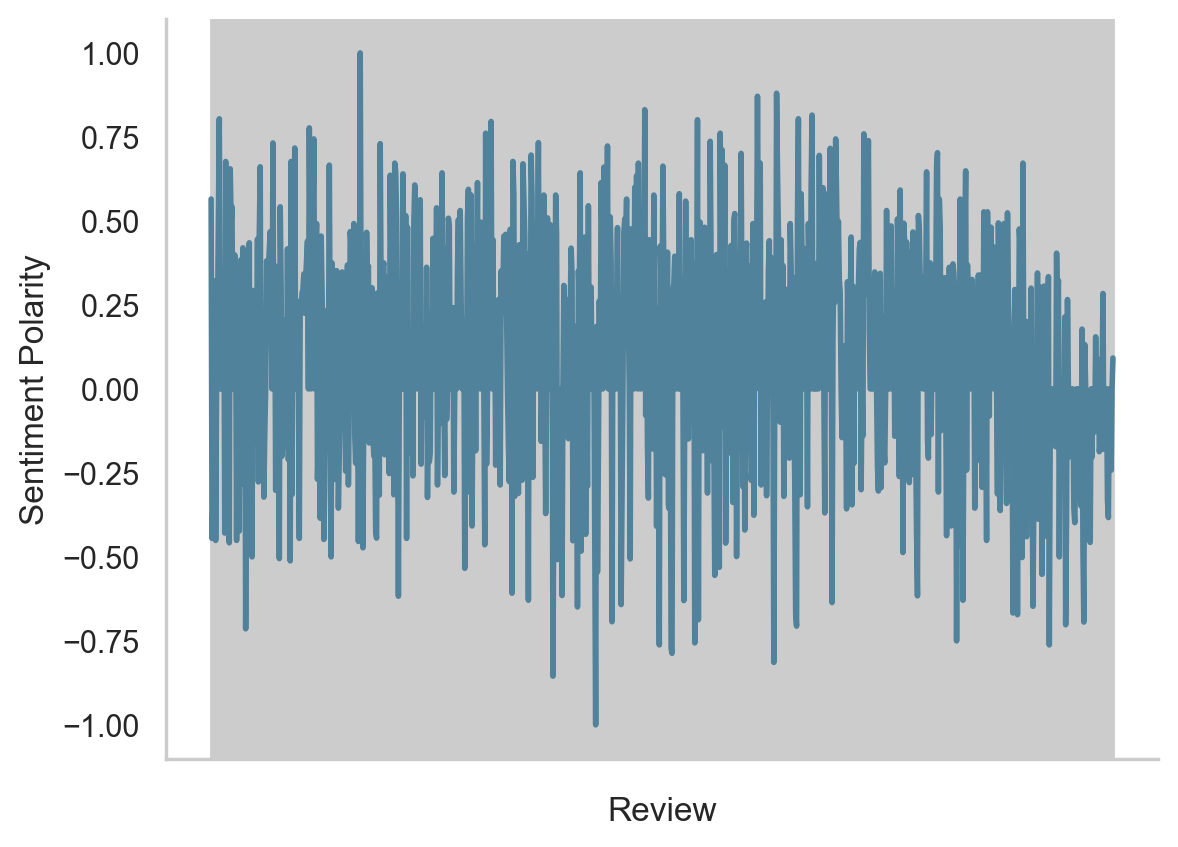

In [233]:
# create a line graph to visualize the ups and downs
line = sns.lineplot(x='review', 
                    y='sentiment_polarity', 
                    data=df_out,
                    color='#51829B',
                    linewidth=2)
line.set(xticklabels=[])
sns.despine()
sns.set_style("white")
line.grid(axis='y')
plt.xlabel('Review')
plt.ylabel('Sentiment Polarity')
line

<Axes: >

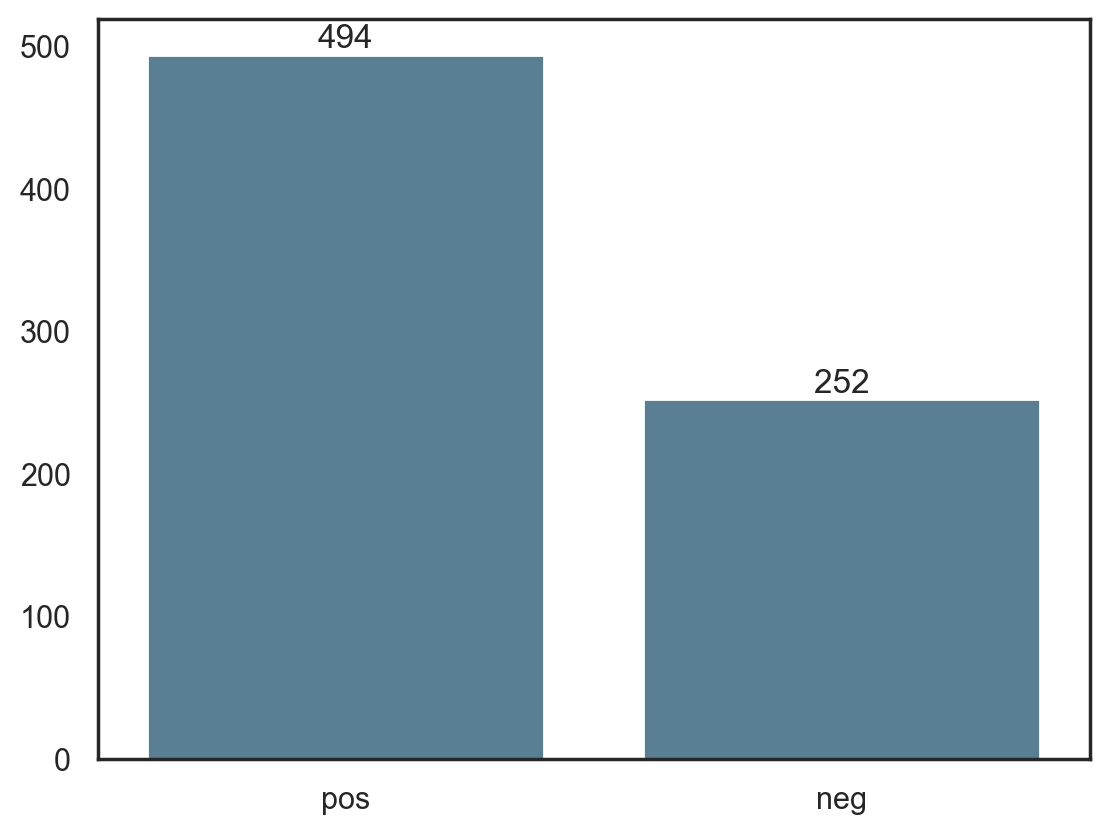

In [234]:
count_pos = 0
count_neg = 0
for sentiment in sentiment_polarity:
    if sentiment > 0:
        count_pos += 1
    elif sentiment < 0:
        count_neg += 1
        
bar = sns.barplot(y=[count_pos,count_neg], 
                x=["pos","neg"],
                color = "#51829B")
sns.set_style("whitegrid")
for i in bar.containers:
    bar.bar_label(i)
bar